In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the datasets
X_train = pd.read_csv('X_Train_Data_Input.csv')
Y_train = pd.read_csv('Y_Train_Data_Target.csv')
X_test = pd.read_csv('X_Test_Data_Input.csv')
Y_test = pd.read_csv('Y_Test_Data_Target.csv')

# Merge input and target data for train and test sets on the "ID" column
train_data = pd.merge(X_train, Y_train, on='ID')
test_data = pd.merge(X_test, Y_test, on='ID')

# Preprocessing: Drop columns with excessive missing values
columns_to_drop = ['Column3', 'Column4', 'Column5', 'Column9', 'Column14']
train_data_cleaned = train_data.drop(columns=columns_to_drop)
test_data_cleaned = test_data.drop(columns=columns_to_drop)

# Impute missing values in remaining columns using median
for col in ['Column0', 'Column6', 'Column8', 'Column15']:
    train_data_cleaned[col] = train_data_cleaned[col].fillna(train_data_cleaned[col].median())
    test_data_cleaned[col] = test_data_cleaned[col].fillna(test_data_cleaned[col].median())

# Separate features and target for train and test sets
X_train_cleaned = train_data_cleaned.drop(columns=['ID', 'target'])
y_train_cleaned = train_data_cleaned['target']
X_test_cleaned = test_data_cleaned.drop(columns=['ID', 'target'])
y_test_cleaned = test_data_cleaned['target']

# Handle imbalance using SMOTE on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_cleaned, y_train_cleaned)

# Feature scaling: Standardize the features for both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_cleaned)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test_scaled)

# Display evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test_cleaned, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_cleaned, y_pred))
print(f"AUC-ROC Score: {roc_auc_score(y_test_cleaned, rf_model.predict_proba(X_test_scaled)[:, 1])}")


Confusion Matrix:
[[230714   6320]
 [   702  23976]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    237034
           1       0.79      0.97      0.87     24678

    accuracy                           0.97    261712
   macro avg       0.89      0.97      0.93    261712
weighted avg       0.98      0.97      0.97    261712

AUC-ROC Score: 0.9923033601703086


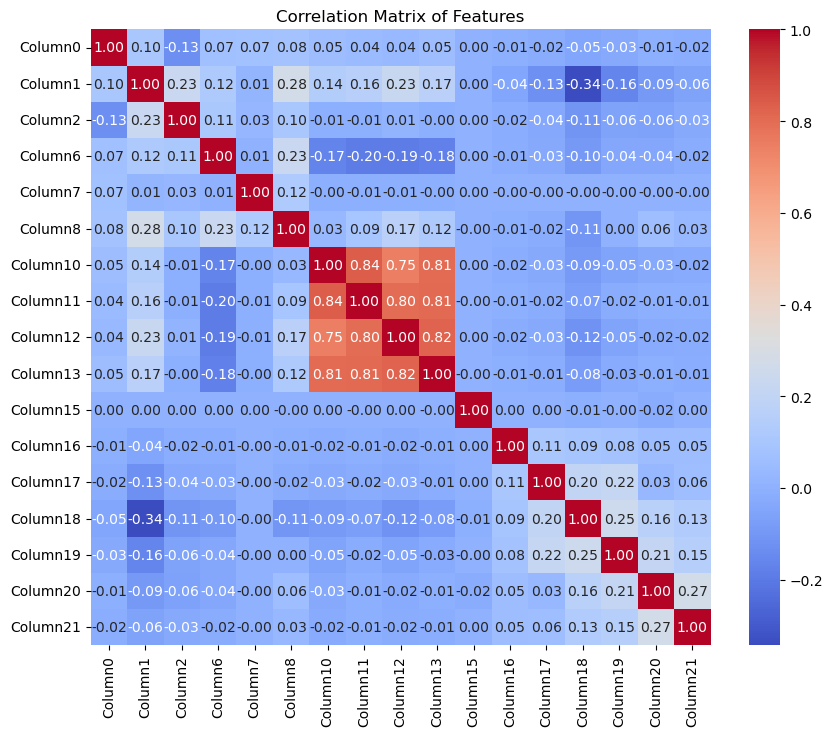

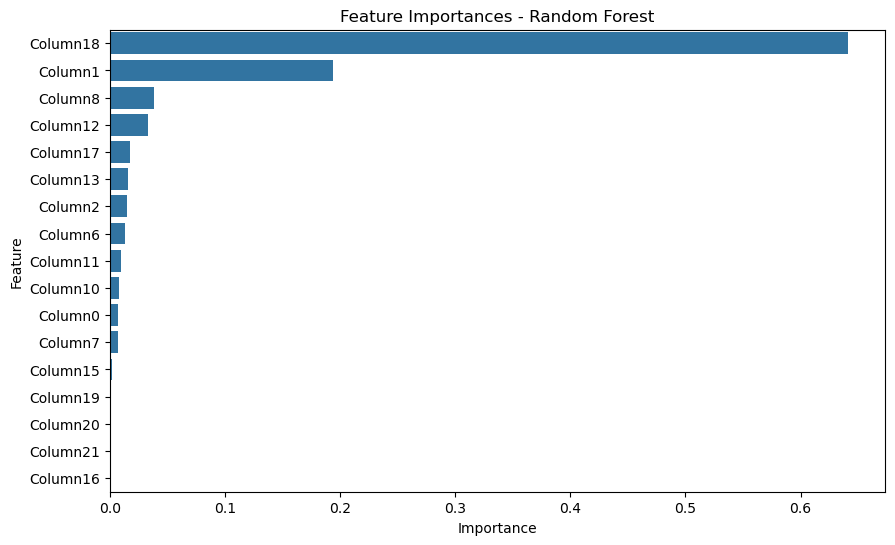

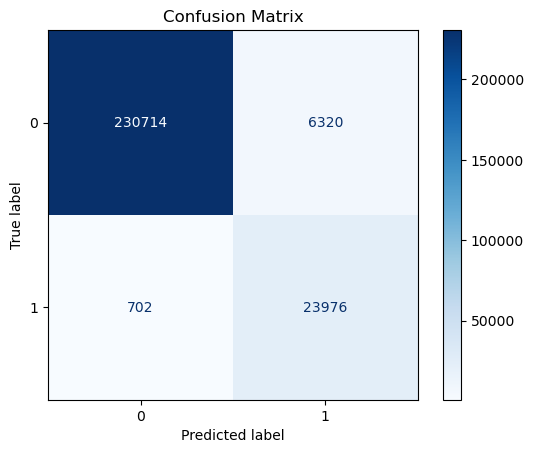

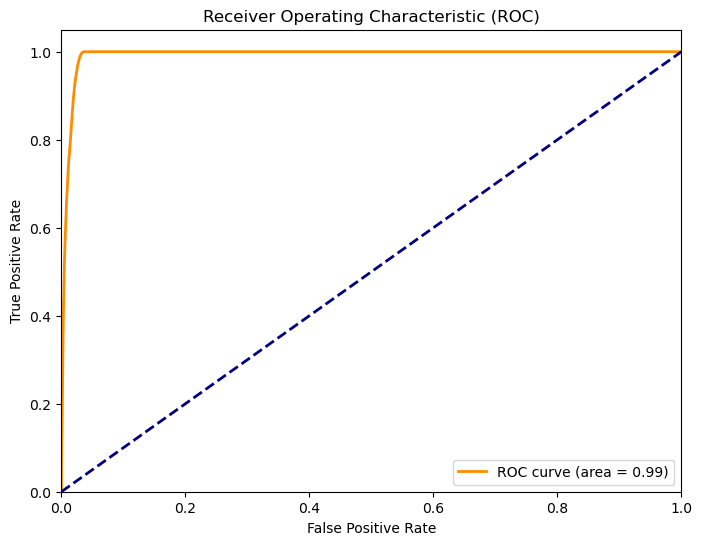

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

# 1. Correlation Matrix (for train data)
plt.figure(figsize=(10, 8))
correlation_matrix = X_train_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

# 2. Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
features = X_train_cleaned.columns

# Create a DataFrame for visualizing feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importances - Random Forest")
plt.show()

# 3. Confusion Matrix Visualization
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test_cleaned, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 4. ROC Curve
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test_cleaned, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the datasets
X_train = pd.read_csv('X_Train_Data_Input.csv')
Y_train = pd.read_csv('Y_Train_Data_Target.csv')
X_test = pd.read_csv('X_Test_Data_Input.csv')
Y_test = pd.read_csv('Y_Test_Data_Target.csv')

# Merge input and target data for train and test sets on the "ID" column
train_data = pd.merge(X_train, Y_train, on='ID')
test_data = pd.merge(X_test, Y_test, on='ID')

# Preprocessing: Drop columns with excessive missing values
columns_to_drop = ['Column3', 'Column4', 'Column5', 'Column9', 'Column14']
train_data_cleaned = train_data.drop(columns=columns_to_drop)
test_data_cleaned = test_data.drop(columns=columns_to_drop)

# Impute missing values in remaining columns using median
for col in ['Column0', 'Column6', 'Column8', 'Column15']:
    train_data_cleaned[col] = train_data_cleaned[col].fillna(train_data_cleaned[col].median())
    test_data_cleaned[col] = test_data_cleaned[col].fillna(test_data_cleaned[col].median())

# Separate features and target for train and test sets
X_train_cleaned = train_data_cleaned.drop(columns=['ID', 'target'])
y_train_cleaned = train_data_cleaned['target']
X_test_cleaned = test_data_cleaned.drop(columns=['ID', 'target'])
y_test_cleaned = test_data_cleaned['target']

# Handle imbalance using SMOTE on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_cleaned, y_train_cleaned)

# Feature scaling: Standardize the features for both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_cleaned)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# --- Prediction Code Starts Here ---
# Example: Single prediction using the first sample from the test set
sample_index = 1  # You can change this to test other samples
single_sample = X_test_scaled[sample_index].reshape(1, -1)

# Predict the class (0 or 1) for the single sample
single_prediction = rf_model.predict(single_sample)
print(f"Prediction for sample {sample_index}: {single_prediction[0]}")

# Predict the probability for the single sample (the probability for each class)
single_prediction_proba = rf_model.predict_proba(single_sample)
print(f"Prediction probabilities for sample {sample_index}: {single_prediction_proba}")

# Example: Batch prediction using the entire test set
batch_predictions = rf_model.predict(X_test_scaled)
print(f"Predictions for the test set:\n{batch_predictions}")

# Compare predictions with actual values (first 10 for comparison)
print(f"\nActual values (first 10): {y_test_cleaned[:10].values}")
print(f"Predicted values (first 10): {batch_predictions[:10]}")

# Example: Predict probability scores for the entire test set
batch_predictions_proba = rf_model.predict_proba(X_test_scaled)
print(f"Prediction probabilities for the test set (first 10):\n{batch_predictions_proba[:10]}")


Prediction for sample 1: 0
Prediction probabilities for sample 1: [[1. 0.]]
Predictions for the test set:
[0 0 0 ... 0 0 0]

Actual values (first 10): [0 0 0 0 0 0 0 0 0 0]
Predicted values (first 10): [0 0 0 0 0 0 0 0 0 0]
Prediction probabilities for the test set (first 10):
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]
